# Week 1 Inroduction

This is an unassessed coursework to help you learn some key Python features that you will undoubtedly need at some point during this module.
For those of you who haven't used Python before please work through [Intro-to-Python](https://gitlab.erc.monash.edu.au/andrease/Python4Maths/-/tree/master/Intro-to-Python) gitlab notebooks they provide excellent introduction to Python.
From 00-07 will be more than sufficient to get you used to Python and of course it will be better if you did more.
And for those who have previous Python experience feel free to skip them.

This coursework should be worked on during the scheduled tutorial sessions where you can ask questions if you get stuck.

In [2]:
import numpy as np
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline #to visualize the plots within the notebook

UsageError: unrecognized arguments: #to visualize the plots within the notebook


## Task 1. Basic loading and displaying
In this task you will learn how to load, display and convert to gray scale RGB images.
### 1.1 Display image
Download a color image and place it in the images' folder if you like or use the images already there.
Now load the image and display it but be careful as different loading functions can represent images in a different datatype or different channels order.

`Hint: images in python can be though of as a multidimentional array`

img shape: (512, 512, 3)


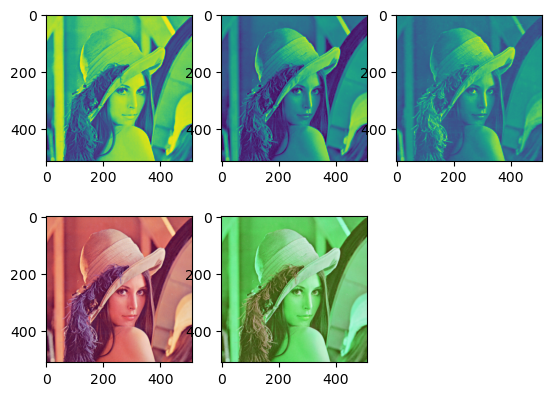

In [3]:
# fill in missing part
# img = np.empty((100,100,3)) # replace this code and load your image
from PIL import Image
img = mpimg.imread('../images/Lenna.png', )
print('img shape:', img.shape)
# display the image
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
plt.subplot(2,3,1)
plt.imshow(R)
plt.subplot(2,3,2)
plt.imshow(G)
plt.subplot(2,3,3)
plt.imshow(B)
plt.subplot(2,3,4)
plt.imshow(img)
plt.subplot(2,3,5)
plt.imshow(np.stack(np.array([B,R,G]), axis=2))




Play a bit with the image and understand how the images are represented in Python for example try:
- Printing the shape
- Try accessing image channels
- Display each channel separately
- Swap the channels and display the image

Did you notice any differences when you swapped the channels? or visualized only one channel ata time?

### 1.2 Convert to gray scale
`Hint: try using cvtColor from openCV packge`

In [4]:
img = cv2.imread('../images/tiger.jpg') # replace this code and load your image
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# display the image
cv2.imshow('gray_img', gray_img)
cv2.waitKey(0)

-1

Try writing your oen method to convert RGB images to gray scale.

In [5]:
def to_gray(img):
    '''
    Convert and RGB image into gray scale
    :param img: RBG image with size HxWx3
    :return: gray scaled image of size HxW
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    gray_img = 1/3*(img[:,:,0]*0.3+img[:,:,1]*0.59+img[:,:,2]*0.11)

    assert gray_img.shape == (h,w), 'Wrong spacial dimensions, your method should only change the channel dimension'
    return gray_img

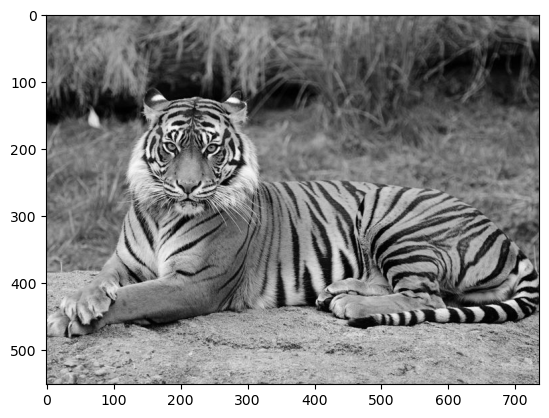

In [6]:
gray_img = to_gray(np.array(img))
gray_img.shape
plt.imshow(gray_img, cmap=plt.cm.gray)

## More advanced basics
Now we have learned how to load and display images, and we have some information about how Python represent images we can do more advance image manipulations.

### 2.1 Transpose
Flip the image across its diagonal.

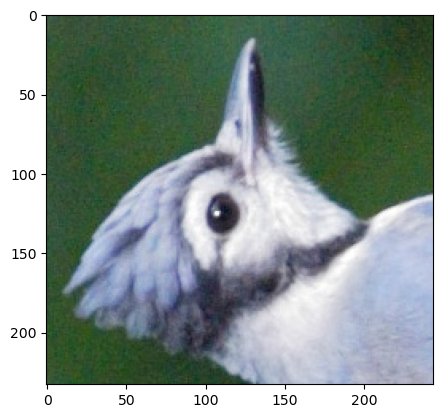

In [23]:
img = plt.imread('../images/sample_image.jpg')
img_flip = np.transpose(np.array(img), (1,0,2))
# # display the image
plt.imshow(img_flip)

### 2.2 Split the image
Split the image into four equal parts and display each of them.
You can display each of them separately or preferably in a single plot using `subplots`.

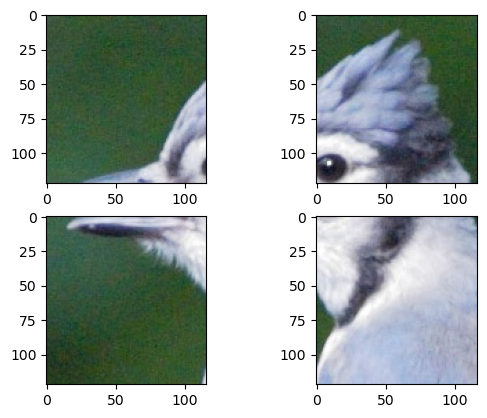

In [25]:
first_part = img[0:int(img.shape[0]/2),0:int(img.shape[1]/2),:]
second_part = img[0:int(img.shape[0]/2),int(img.shape[1]/2):,:]
third_part = img[int(img.shape[0]/2):,0:int(img.shape[1]/2),:]
fourth_part = img[int(img.shape[0]/2):,int(img.shape[1]/2):,:]

plt.subplot(2,2,1)
plt.imshow(first_part)
plt.subplot(2,2,2)
plt.imshow(second_part)
plt.subplot(2,2,3)
plt.imshow(third_part)
plt.subplot(2,2,4)
plt.imshow(fourth_part)

## Scaling and loops
Use openCV python routines to scale down the image and plot them side by side with the full scaled image.
Write your own function to scale down the image using an average of 4 pixels.

In [18]:
img = cv2.imread('../images/Lenna.png')
cv2.imshow('awdf',img)
cv2.waitKey(0)

-1

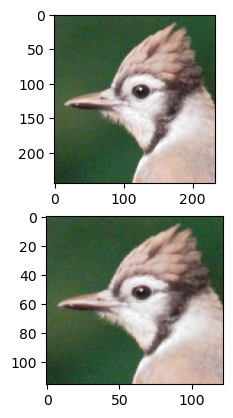

In [22]:
img = cv2.imread('../images/sample_image.jpg') # replace this part

axes = plt.subplot(2,1,1)
# display original image
plt.imshow(np.array(img))

# display scaled down image
axes = plt.subplot(2,1,2)
scaled_img = cv2.resize(img,(int(img.shape[0]/2), int(img.shape[1]/2)))
plt.imshow(scaled_img)

In [72]:
def average_scale_down(img):
    '''
    Scale down and RGB image
    :param img: RBG image with size HxWx3
    :return: scaled_img: RBG scaled down image with size (H/4)x(W/4)x3
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    
    scaled_img = np.zeros([img.shape[0]//2, img.shape[1]//2, 3])
    for i in range(0, img.shape[0]-1, 2):
        for j in range(0, img.shape[1]-1, 2):
            scaled_img[i//2,j//2] = np.sum(img[i:i+2,j:j+2])/4
    
    assert scaled_img.shape == (h//2,w//2, 3), f'Wrong spacial dimensions, your method should reduce the spacial dimensions by a factor of four we expect {(h//2,w//2, 3)} instead we have {scaled_img.shape}'
    return scaled_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


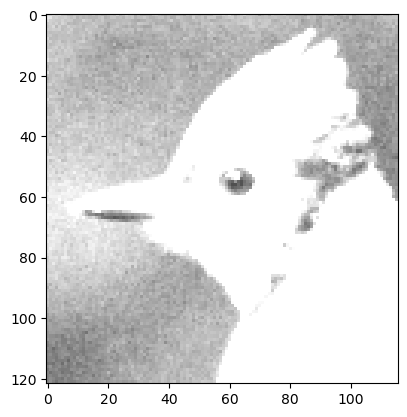

In [73]:
scaled_img = average_scale_down(img)
scaled_img  = np.array(scaled_img, dtype=np.int32)
plt.imshow(scaled_img)

Similarly, how can you double the size of an image?
What sort of artefacts are visible if you do so?
Try and code this out yourself.

### Advanced
Nested loops can take a lot of time you may already noticed, rewrite your scale down function without using loops.

`Hint: make use of extrcat 2d pathes in sklearn alredy impelemnted for you in utils`

In [38]:
from utils import *
scaled_img = extract_patches_2d(img, patch_size=[2,2])

In [39]:
scaled_img.shape

(122, 116, 2, 2, 3)

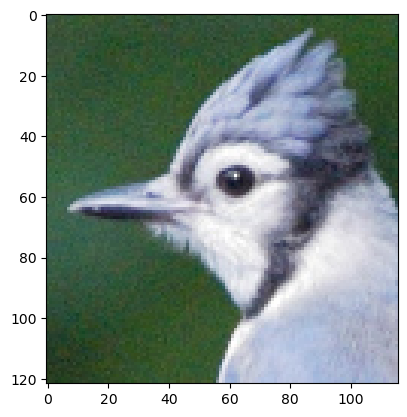

In [48]:
plt.imshow(scaled_img[:,:,1,1,:])